In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the train and test datasets to create two DataFrames
train_url = "./data/train.csv"
train = pd.read_csv(train_url)

In [3]:
test_url = "./data/test.csv"
test = pd.read_csv(test_url)

In [4]:
print "train len: {}".format(len(train))
print "test len: {}".format(len(test))

#data example
train.head()

train len: 891
test len: 418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
age_null = train["Age"].isnull()
print "missed age count: {}".format(len(train[age_null]))
print "missed age embarked value: {}".format(len(train[train["Embarked"].isnull()]))
print "missed age fare value: {}".format(len(train[train["Fare"].isnull()]))
print "missed age cabin value: {}".format(len(train[train["Cabin"].isnull()]))

missed age count: 177
missed age embarked value: 2
missed age fare value: 0
missed age cabin value: 687


In [6]:
print "For {} passangers fare is 0.".format(len(train[train["Fare"] == 0]))

For 15 passangers fare is 0.


###### Who has missed Embarked field?

In [7]:
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


###### Boarding info is missing for 2 first class passengers. Let see, how many passangers from diffrent ports have the first class ticket

In [8]:
zero_fare = train["Fare"] == 0
first_class = train["Pclass"] == 1

train[(~zero_fare) & first_class].pivot_table(values='Fare', index='Embarked', aggfunc=[np.size, np.mean, np.min, np.max])

,size,mean,amin,amax
Embarked,,,,
C,85.0,104.718529,26.55,512.3292
Q,2.0,90.000000,90.00,90.0000
S,122.0,73.248668,5.00,263.0000


In [9]:
train[(~zero_fare) & first_class & (train["Fare"] == 5.0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S


###### Seems that more likelly, passanges 62 and 830 were boarded in Southampton

In [10]:
train.loc[61, "Embarked"] = 'S'
train.loc[829, "Embarked"] = 'S'

###### Let's look to passangers that have 0 fare

In [11]:
train[zero_fare]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


###### All of them were boarded in Southampton, let's see what we have for Southampton

In [12]:
from_southampton = train["Embarked"] == "S"

train[(~zero_fare) & from_southampton].groupby("Pclass")["Fare"].describe()

Pclass       
1       count    124.000000
        mean      73.357560
        std       57.743728
        min        5.000000
        25%       30.375000
        50%       52.827100
        75%       84.231250
        max      263.000000
2       count    158.000000
        mean      21.099367
        std       13.285582
        min       10.500000
        25%       13.000000
        50%       14.500000
        75%       26.000000
        max       73.500000
3       count    349.000000
        mean      14.811923
        std       13.259006
        min        6.237500
        25%        7.875000
        50%        8.050000
        75%       16.100000
        max       69.550000
Name: Fare, dtype: float64

###### While I looked how propage missed fare, I saw that some 3rd class passangers payed much more than others.

In [13]:
third_class = train["Pclass"] == 3

train[(train["Fare"] > 69) & third_class]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


###### This is a big family, seems that is fare for whole family 69.55 / 10 = 6.955. Mean for 3rd passangers from Southampton

In [14]:
third_from_s = from_southampton & third_class
train[(~ zero_fare) & third_from_s & (train["Ticket"] != "CA. 2343")].groupby("Pclass")["Fare"].describe()

Pclass       
3       count    342.000000
        mean      13.691554
        std       10.800204
        min        6.237500
        25%        7.854200
        50%        8.050000
        75%       15.900000
        max       56.495800
Name: Fare, dtype: float64

###### Lets fill missed fare data
But first, I`ll create new data set by combining train and test datasets in order get more precise mean of "fare"

In [15]:
all_data = train.copy().append(test.copy())

###### As was discovered with Sage family, same passengers have same ticket number and combined ticket price for all family/group of people. 
Lets create new column with count of passangers that share same ticket number

In [16]:
all_data["group"] = all_data.groupby("Ticket")["PassengerId"].transform("count")

###### Now I can calculate ticket price per passenger

In [17]:
all_data["ticket_price"] = all_data["Fare"] / all_data["group"]
all_data[all_data["ticket_price"] > 0].groupby("Pclass").ticket_price.describe()

Pclass       
1       count    316.000000
        mean      34.661682
        std       14.675124
        min        5.000000
        25%       26.550000
        50%       30.000000
        75%       39.133350
        max      128.082300
2       count    271.000000
        mean      11.663652
        std        2.031927
        min        5.250000
        25%       10.500000
        50%       12.650000
        75%       13.000000
        max       16.000000
3       count    704.000000
        mean       7.370788
        std        1.367423
        min        3.170800
        25%        7.061975
        50%        7.750000
        75%        7.925000
        max       19.966700
Name: ticket_price, dtype: float64

###### I noticed some outlier in data of 1st class passengers. Max ticket_price: 128.082300 with mean 34. Intresting

In [18]:
all_data[all_data["ticket_price"] > 128]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,group,ticket_price
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755,4,128.0823
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755,4,128.0823
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755,4,128.0823
343,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN,PC 17755,4,128.0823


According to https://www.encyclopedia-titanica.org/titanic-survivor/thomas-cardeza.html, that was mother and son with 2 their servants. They occupied most expensive cabins

In [19]:
all_data[(all_data["SibSp"] + all_data["Parch"]) + 1 > all_data["group"]].head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,group,ticket_price
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,7.2500
38,18.0,NaN,S,18.0000,"Vander Planke, Miss. Augusta Maria",0,39,3,female,2,0.0,345764,2,9.0000
40,40.0,NaN,S,9.4750,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0,41,3,female,1,0.0,7546,1,9.4750
68,17.0,NaN,S,7.9250,"Andersson, Miss. Erna Alexandra",2,69,3,female,4,1.0,3101281,1,7.9250
69,26.0,NaN,S,8.6625,"Kink, Mr. Vincenz",0,70,3,male,2,0.0,315151,1,8.6625


###### Seems that not all family members have same/shared ticket number. 
Let's update "group" column with maximum of current value or parch + sibsp + 1, whatever is bigger

In [20]:
all_data["group"] = all_data.groupby("Ticket")["PassengerId"].transform("count")
all_data["family"] =  all_data["SibSp"] + all_data["Parch"] + 1

all_data["group"] = all_data[["family", "group"]].max(axis=1)

###### Now I can calculate ticket_price for passengers that had originally messed "Fare" value

In [21]:
zero_fare = (all_data["Fare"] == 0) | (all_data["Fare"].isnull())

first_class = all_data["Pclass"] == 1
second_class = all_data["Pclass"] == 2
third_class = all_data["Pclass"] == 3

#as all passengers that have missed "fare" values were boarded in Southampton
from_southampton = all_data["Embarked"] == "S"

first_from_s = from_southampton & first_class
second_from_s = from_southampton & second_class
third_from_s = from_southampton & third_class

all_data.loc[zero_fare & first_class, "ticket_price"] = all_data[~zero_fare & first_from_s].ticket_price.mean()
all_data.loc[zero_fare & second_class, "ticket_price"] = all_data[~zero_fare & second_from_s].ticket_price.mean()
all_data.loc[zero_fare & third_class, "ticket_price"] = all_data[~zero_fare & third_from_s].ticket_price.mean()


###### Time to investigate age data

In [22]:
age_null = all_data["Age"].isnull()

all_data[~age_null]["Age"].describe() 

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [23]:
all_data[age_null].groupby("Pclass")["PassengerId"].count()

Pclass
1     39
2     16
3    208
Name: PassengerId, dtype: int64

In [24]:
all_data[~age_null & third_class].groupby("Sex").Age.describe()

Sex          
female  count    152.000000
        mean      22.185329
        std       12.205254
        min        0.170000
        25%       16.000000
        50%       22.000000
        75%       30.000000
        max       63.000000
male    count    349.000000
        mean      25.962264
        std       11.682415
        min        0.330000
        25%       20.000000
        50%       25.000000
        75%       32.000000
        max       74.000000
Name: Age, dtype: float64

In [25]:
all_data[~age_null & first_class].groupby("Sex").Age.describe()

Sex          
female  count    133.000000
        mean      37.037594
        std       14.272460
        min        2.000000
        25%       24.000000
        50%       36.000000
        75%       48.000000
        max       76.000000
male    count    151.000000
        mean      41.029272
        std       14.578529
        min        0.920000
        25%       30.000000
        50%       42.000000
        75%       50.000000
        max       80.000000
Name: Age, dtype: float64

###### Seems that median of age of the first class is higher than 3rd, also women are younger than men. 
Lets use this information to fill our missed data

In [26]:
women = all_data["Sex"] == "female"
men = all_data["Sex"] == "male"

all_data.loc[age_null & first_class & women, "Age"] = all_data[~age_null & first_class & women].Age.mean()
all_data.loc[age_null & first_class & men, "Age"] = all_data[~age_null & first_class & men].Age.mean()

all_data.loc[age_null & second_class & women, "Age"] = all_data[~age_null & second_class & women].Age.mean()
all_data.loc[age_null & second_class & men, "Age"] = all_data[~age_null & second_class & men].Age.mean()

all_data.loc[age_null & third_class & women, "Age"] = all_data[~age_null & third_class & women].Age.mean()
all_data.loc[age_null & third_class & men, "Age"] = all_data[~age_null & third_class & men].Age.mean()

###### And finally propagete calculated age and fare to our origin train and test datasets

In [27]:
train_filter = all_data[all_data.PassengerId.isin(train.PassengerId)]
test_filter = all_data[all_data.PassengerId.isin(test.PassengerId)]

train.loc[train["Age"].isnull(), "Age"] = train_filter.Age
test.loc[test["Age"].isnull(), "Age"] = test_filter.Age

train["ticket_price"] = train_filter.ticket_price
test["ticket_price"] = test_filter.ticket_price

train["group"] = train_filter.group
test["group"] = test_filter.group


###### Prepare data for ml, converting string classes to integer representation

In [28]:
women = train["Sex"] == "female"
men = train["Sex"] == "male"

target = train["Survived"].values

train.loc[men, "Sex"] = 0
train.loc[women, "Sex"] = 1

# Convert the Embarked classes to integer form
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

###### Lets try to create new feature Child

In [29]:
train["Child"] = float('NaN')

# Assign 1 to passengers under 18, 0 to those 18 or older. Print the new column.
train.loc[train["Age"] < 18, "Child"] = 1
train.loc[train["Age"] >= 18, "Child"] = 0

In [30]:
#add visual utils
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.dirname(path.abspath(getsourcefile(lambda:0))))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

import visuals as vs
import metrics as ms

In [31]:
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

# Convert the Embarked classes to integer form
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2

###### Now time to test cleaned data to find out whether are possible predict who survived during Titanic disaster

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


In [33]:
features = ["Pclass", "Age", "Sex", "group", "ticket_price"]
selected_features_train = train[features].values
selected_features_test = test[features].values

AdaBoostClassifier trained on 8 samples.
AdaBoostClassifier trained on 89 samples.
AdaBoostClassifier trained on 891 samples.
GradientBoostingClassifier trained on 8 samples.
GradientBoostingClassifier trained on 89 samples.
GradientBoostingClassifier trained on 891 samples.
RandomForestClassifier trained on 8 samples.
RandomForestClassifier trained on 89 samples.
RandomForestClassifier trained on 891 samples.


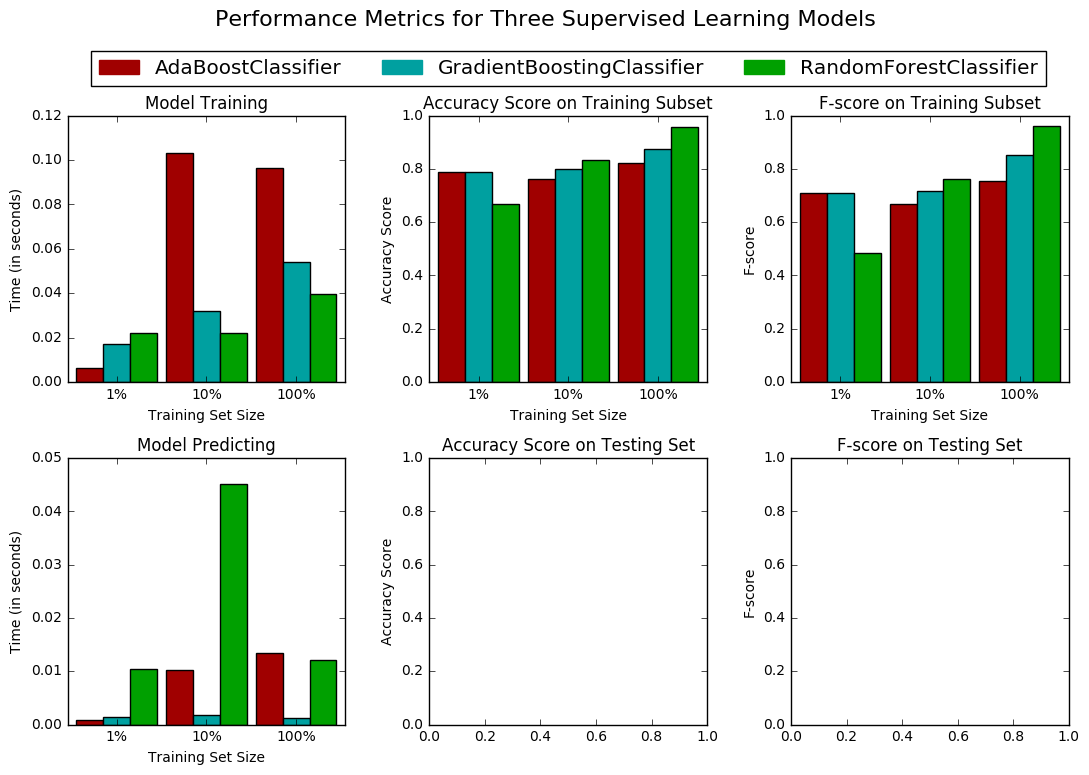

In [34]:
# Initialize the three models
clf_A = AdaBoostClassifier()
clf_B = GradientBoostingClassifier()
clf_C = RandomForestClassifier()

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(len(selected_features_train) * 0.01)
samples_10 = int(len(selected_features_train) * 0.1)
samples_100 = len(selected_features_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        ms.train_predict(clf, samples, selected_features_train, target, selected_features_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results)

In [33]:
# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 10, min_samples_split=5, n_estimators = 100, random_state = 1)
my_forest = forest.fit(features_forest, target)

In [34]:
forest.score(features_forest, target)

0.92255892255892258

In [35]:
my_forest.feature_importances_

array([ 0.09728118,  0.22174641,  0.34677606,  0.09203066,  0.2421657 ])

In [36]:
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(features_forest)

forest_scaled = RandomForestClassifier(max_depth = 10, min_samples_split=5, n_estimators = 100, random_state = 1)
my_forest_scaled = forest_scaled.fit(X_train_minmax, target)


print forest.score(X_train_minmax, target)

print my_forest_scaled.feature_importances_

print X_train_minmax

0.383838383838
[ 0.09728118  0.22174641  0.34677606  0.09203066  0.2421657 ]
[[ 1.          0.27117366  0.          0.1         0.02845434]
 [ 0.          0.4722292   1.          0.1         0.25673588]
 [ 1.          0.32143755  1.          0.          0.03388164]
 ..., 
 [ 1.          0.2735025   1.          0.3         0.01729822]
 [ 0.          0.32143755  0.          0.          0.2113745 ]
 [ 1.          0.39683338  0.          0.          0.03247456]]


/home/denys/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [37]:
print train[train["Survived"] == 0].groupby("Pclass").Survived.count()


Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64


In [38]:
print 136 /(80.0 + 136)
print 87 /(97. + 87)
print 119 /(372. + 119)

0.62962962963
0.472826086957
0.242362525458


In [39]:
train[train["Survived"] == 1].groupby("Pclass").Survived.count()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [43]:
test[test["PassengerId"] ==1126]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_price,group,Child
234,1126,1,"Cumings, Mr. John Bradley",0,39.0,1,0,PC 17599,71.2833,C85,1,35.64165,2,0.0


In [190]:
# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId = np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(pred_forest, PassengerId, columns = ["Survived"])
print(my_solution)

# Check that your data frame has 418 entries
print(my_solution.shape)
print(my_solution.shape[0])

# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("/home/denys/with_cleared_data.csv", index_label = ["PassengerId"])

      Survived
892          0
893          0
894          0
895          0
896          1
897          0
898          0
899          0
900          1
901          0
902          0
903          0
904          1
905          0
906          1
907          1
908          0
909          0
910          1
911          0
912          0
913          1
914          1
915          1
916          1
917          0
918          1
919          0
920          1
921          0
...        ...
1280         0
1281         0
1282         0
1283         1
1284         0
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         0
1296         0
1297         0
1298         0
1299         0
1300         1
1301         1
1302         1
1303         1
1304         0
1305         0
1306         1
1307         0
1308         0
1309         0

[418 rows x 1 columns]
(418, 1)
418
